C:\Users\Admin\AppData\Local\Temp\ipykernel_2596\3292871712.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='day_name'>

Text(0.5, 1.0, 'Pedestrian Counts by Weekday')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Total Pedestrian Count')

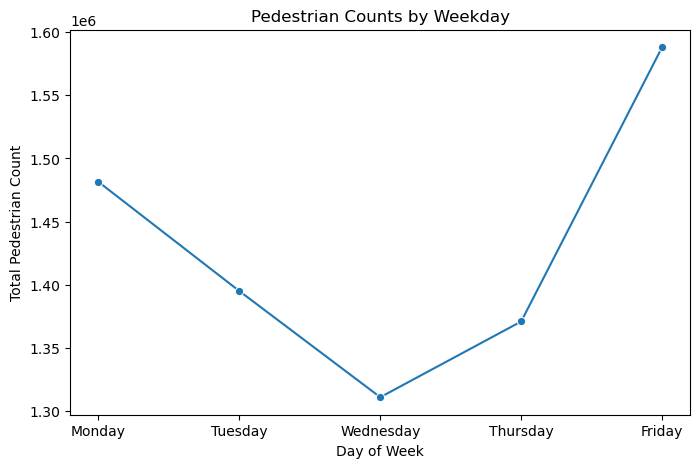

In [14]:
#1. Plot a line graph showing the pedestrian counts for each day of the week.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df_weekdays = df.loc[df['hour_beginning'].dt.dayofweek < 5].copy()
df_weekdays.loc[:, 'day_name'] = df_weekdays['hour_beginning'].dt.day_name()

numeric_cols = df_weekdays.select_dtypes(include='number').columns
ped_col = numeric_cols[0]

day_counts = df_weekdays.groupby('day_name')[ped_col].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday']
)

plt.figure(figsize=(8,5))
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o')
plt.title('Pedestrian Counts by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Total Pedestrian Count')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2596\4000633450.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning,Pedestrians,weather_summary
2117,2019-05-31 06:00:00,188,clear-day
1818,2019-08-24 10:00:00,1687,clear-day
1814,2019-06-22 06:00:00,163,clear-day
6831,2019-05-06 07:00:00,301,clear-day
3816,2019-04-23 09:00:00,1086,clear-day
...,...,...,...
5277,2019-06-17 01:00:00,0,NaN
5562,2019-02-02 00:00:00,0,NaN
5934,2019-09-06 00:00:00,2,NaN
5962,2019-05-08 00:00:00,3,NaN


,mean,sum,count
weather_summary,,,
clear-day,1382.183298,1953025,1413
clear-night,33.233871,61815,1860
cloudy,543.225041,984867,1813
fog,212.409091,4673,22
partly-cloudy-day,1574.093627,2790868,1773
partly-cloudy-night,52.765922,63794,1209
rain,229.822076,139502,607
sleet,178.250000,1426,8
snow,222.631579,8460,38


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='weather_summary'>

Text(0.5, 0, 'Weather Summary')

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 1.0, 'Average Pedestrian Counts by Weather Condition (2019)')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'wind'),
  Text(3, 0, 'cloudy'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'snow'),
  Text(6, 0, 'fog'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'partly-cloudy-night'),
  Text(9, 0, 'clear-night')])

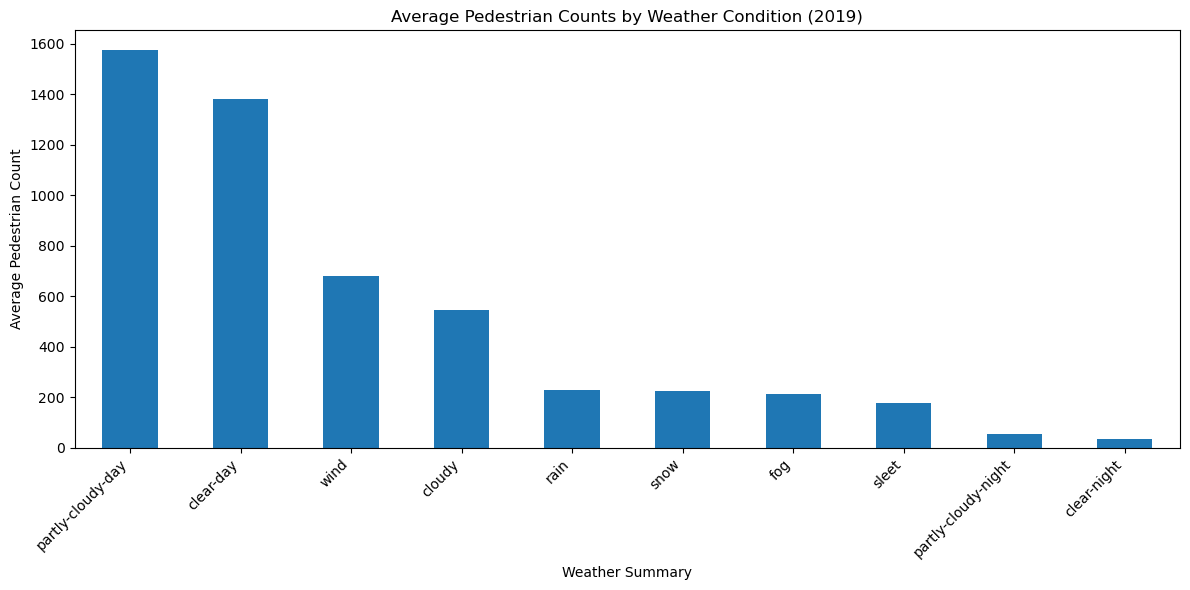

,Pedestrians,temperature,precipitation
Pedestrians,1.000000,0.358757,-0.105432
temperature,0.358757,1.000000,0.001911
precipitation,-0.105432,0.001911,1.000000


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix: Weather vs Pedestrian Counts (2019)')

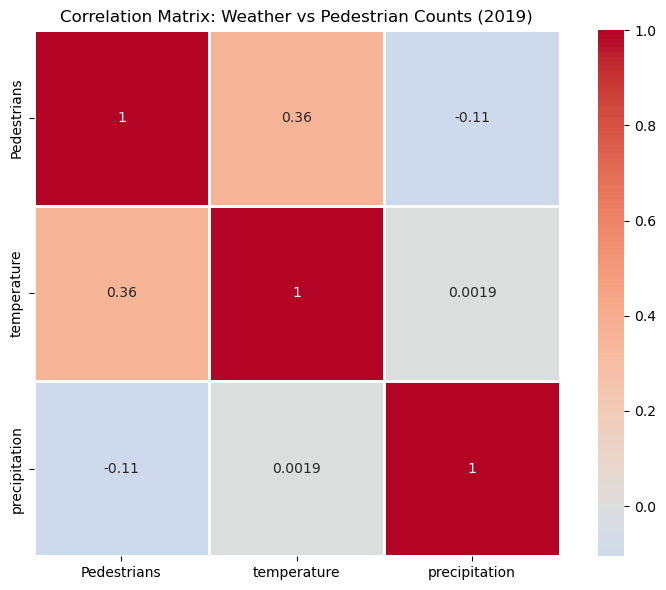

In [16]:
#2. Pedestrian counts on the Brooklyn Bridge for the year 2019 &  how different weather conditions influence pedestrian activity in that year.

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['year'] = df['hour_beginning'].dt.year

df_2019 = df[df['year'] == 2019]

df_2019_sorted = df_2019.sort_values('weather_summary')
df_2019_sorted[['hour_beginning', 'Pedestrians', 'weather_summary']]

weather_counts = df_2019.groupby('weather_summary')['Pedestrians'].agg(['mean', 'sum', 'count'])
weather_counts

plt.figure(figsize=(12, 6))
weather_counts['mean'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Weather Summary')
plt.ylabel('Average Pedestrian Count')
plt.title('Average Pedestrian Counts by Weather Condition (2019)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df_2019_numeric = df_2019[['Pedestrians', 'temperature', 'precipitation']].dropna()
correlation_matrix = df_2019_numeric.corr()
correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Matrix: Weather vs Pedestrian Counts (2019)')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2596\3486663690.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning,hour,time_of_day,Pedestrians
0,2019-04-30 00:00:00,0,Night,3
1,2019-12-31 22:00:00,22,Night,10
2,2019-12-31 23:00:00,23,Night,2
3,2019-12-31 21:00:00,21,Evening,12
4,2019-04-01 03:00:00,3,Night,1
...,...,...,...,...
16052,2018-06-22 04:00:00,4,Night,7
16053,2018-07-19 06:00:00,6,Morning,192
16054,2018-06-16 16:00:00,16,Afternoon,2623
16055,2018-07-24 18:00:00,18,Evening,2016


time_of_day
Afternoon    1694.841305
Evening       596.591928
Morning       614.543099
Night          31.107230
Name: Pedestrians, dtype: float64

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day')

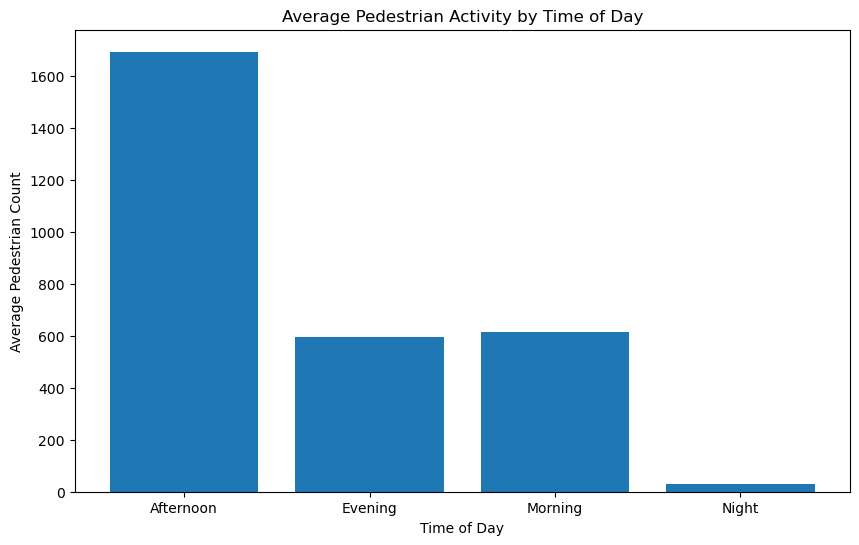

hour
0       34.038864
1       11.637313
2        5.578475
3        3.330344
4        2.792227
5       20.636771
6       87.328849
7      184.588939
8      309.765321
9      554.192825
10    1057.479821
11    1493.902840
12    1648.055306
13    1723.724963
14    1783.831091
15    1838.499253
16    1753.310912
17    1421.626308
18    1066.028401
19     731.582960
20     416.255605
21     172.500747
22     103.337818
23      67.535127
Name: Pedestrians, dtype: float64

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 1.0, 'Pedestrian Activity Throughout the Day')

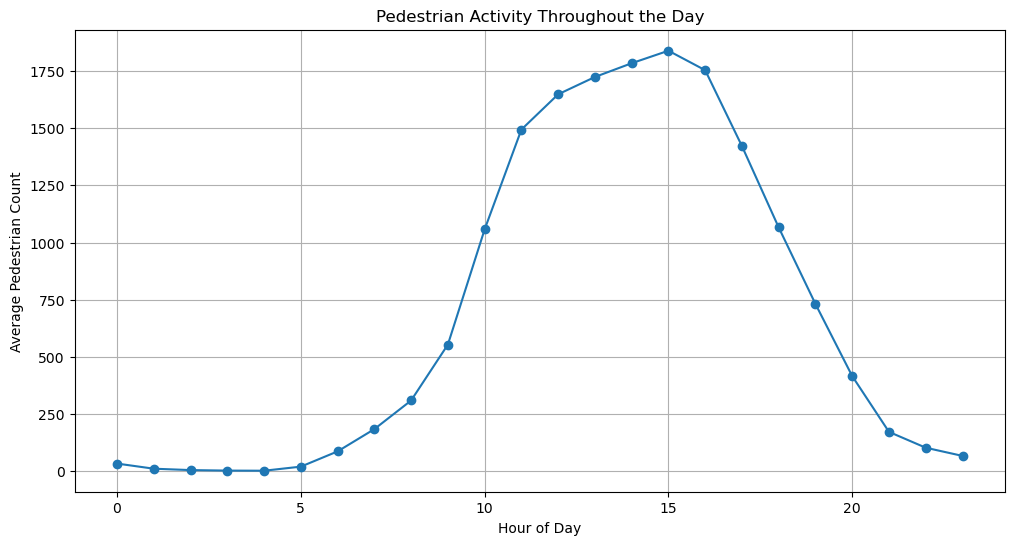

In [18]:
#3. Custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories.

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['hour'] = df['hour_beginning'].dt.hour

def categorize_time_of_day(hour):
    if hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    elif hour >= 18 and hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

df[['hour_beginning', 'hour', 'time_of_day', 'Pedestrians']]

time_of_day_avg = df.groupby('time_of_day')['Pedestrians'].mean()
time_of_day_avg

plt.figure(figsize=(10, 6))
plt.bar(time_of_day_avg.index, time_of_day_avg.values)
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.title('Average Pedestrian Activity by Time of Day')
plt.show()

hourly_avg = df.groupby('hour')['Pedestrians'].mean()
hourly_avg

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pedestrian Count')
plt.title('Pedestrian Activity Throughout the Day')
plt.grid(True)
plt.show()